In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-map-hd/map.png
/kaggle/input/boston/calendar.csv
/kaggle/input/boston/listings.csv
/kaggle/input/boston/reviews.csv
/kaggle/input/boston-map/Boston.PNG


# ***Business Understanding***

Airbnb is an online marketplace which lets people to rent their properties, rooms in their house, or share their rooms to the guests. This blog is an effort to interpret the Airbnb, Boston dataset retrieved from Kaggle and answer few business questions, mentioned below.

The dataset retrieved is a collection of property listings, their key features and types, such as property type, host type, neighborhood, reviews and much more.


1.) What are the features that influence the property pricing?

2.) What time of year has the highest rental prices?

3.) Do Superhosts perform better than other hosts?

4.) How are the listings distributed on Boston city?

5.) Create a model to predict property pricing


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
#import necessary libraries for performing prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Data Understanding

In [3]:
#Gather Data from Kaggle dataset
df_list = pd.read_csv("/kaggle/input/boston/listings.csv")
df_cal = pd.read_csv("/kaggle/input/boston/calendar.csv")

#Identifyt the number of rows and columns in the dataset
for data in [df_list, df_cal]:
    print(data.shape)

(3585, 95)
(1308890, 4)


In [4]:
#Explore the data set and identify the data type
for data in [df_list, df_cal]:
    display(data.head(5))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


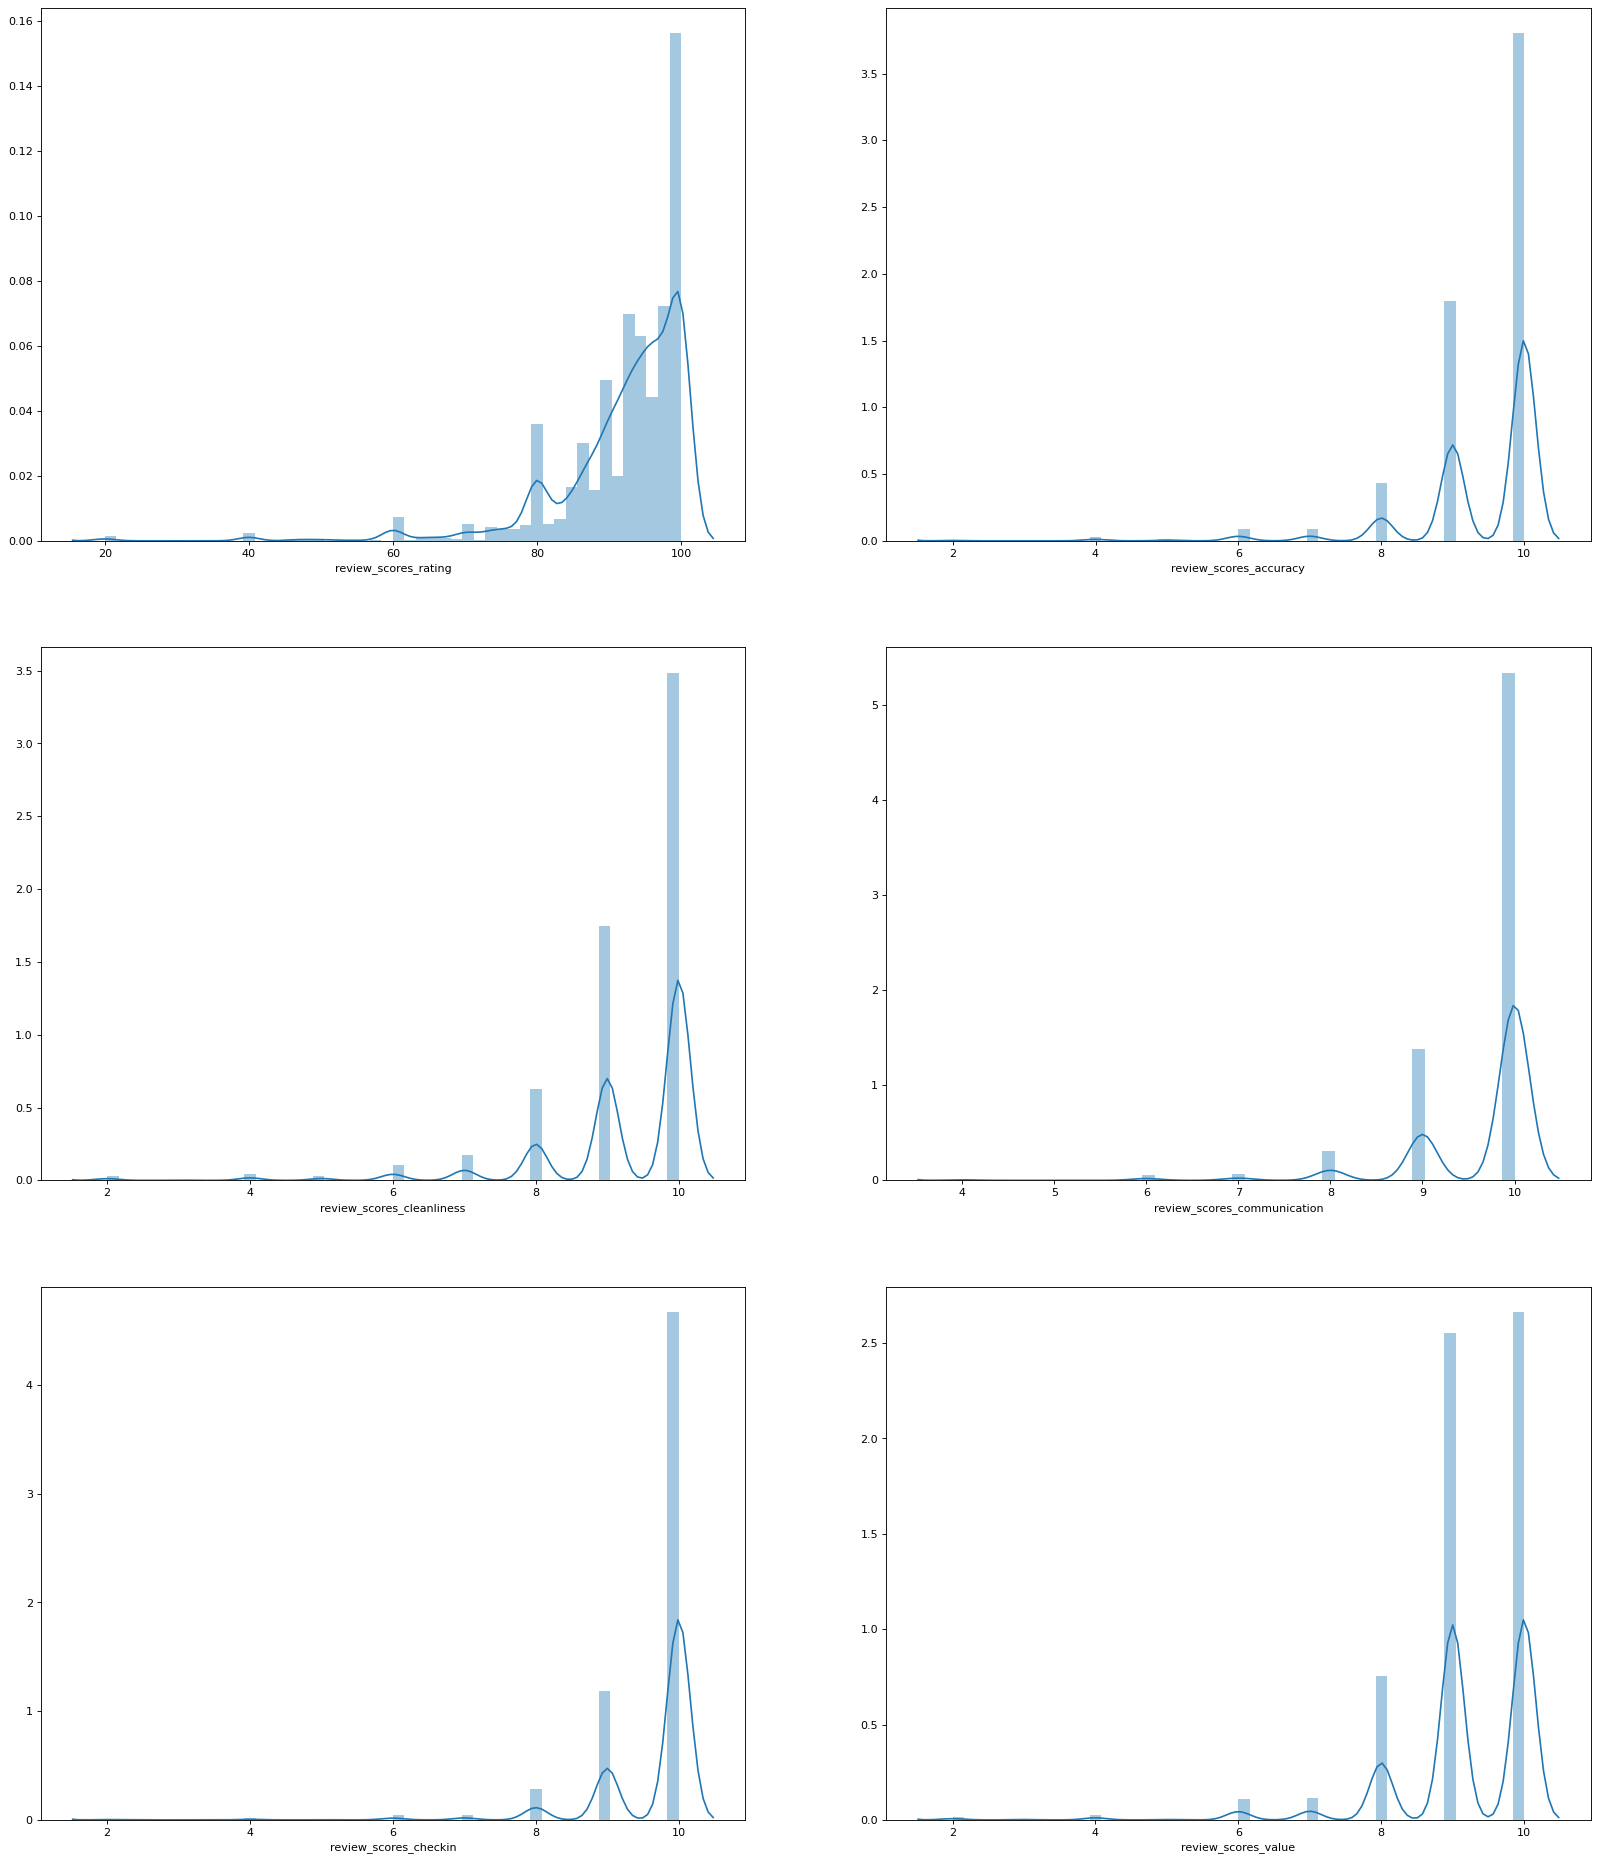

In [5]:
#Visualize the distribution of review data to understand how skewed it is
fig, axs = plt.subplots(3, 2, figsize=(25, 30), dpi=80)

sns.distplot(df_list["review_scores_rating"], ax=axs[0, 0])
sns.distplot(df_list["review_scores_accuracy"], ax=axs[0, 1])
sns.distplot(df_list["review_scores_cleanliness"], ax=axs[1, 0])
sns.distplot(df_list["review_scores_communication"], ax=axs[1, 1])
sns.distplot(df_list["review_scores_checkin"], ax=axs[2, 0])
sns.distplot(df_list["review_scores_value"], ax=axs[2, 1])

In [6]:
#check for the each column's datatype and the number of non-null values in the data set.
#this helps to understand features better and their contribution for data analysis.
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [7]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [8]:
#Columns will all value as NaN is useless and cannot be filled with any reference value in the column
#Remove the column which has all values as NaN
df_list.dropna(axis = 1, how = 'all', inplace = True)
df_list.shape

(3585, 91)

# Data Preparation - Listing dataset (df_list)

* In order to analyse the property size, we need to consider the **property type, room type, and bedrooms** feature from the data set.

* We will further explore the above said feature and create a new dataframe.

In [9]:
#Fill na with ffill/bfill since it is an object type and cannot be interpreted with numerical methods to fillna
df_list['host_response_rate'].fillna(method = 'backfill', inplace = True)
df_list['host_acceptance_rate'].fillna(method = 'backfill', inplace = True)
df_list['host_response_time'].fillna(method = 'backfill', inplace = True)


#Remove % sign and convert the data type to int
df_list['host_response_rate'] = (df_list['host_response_rate'].str[:-1].astype(int))
df_list['host_acceptance_rate'] = (df_list['host_acceptance_rate'].str[:-1].astype(int))

As per the summary of df_list, bathrooms, bedrooms, and bed columns have a negligle number of rows with null vlaues, so it is better to drop those rows to avoid any little effect of bias in the results.

* bathrooms                         3571 non-null   float64
* bedrooms                          3575 non-null   float64
* beds                              3576 non-null   float64

In [10]:
#drop na rows in bathrooms, bedrooms, beds since its a negligle number of rows with na value
df_list.dropna(axis = 0, subset = ["bathrooms", "bedrooms", "beds"], inplace = True)

#Creating new dataframe with bathrooms, bedrooms, beds
df_rooms = df_list[["bathrooms", "bedrooms", "beds"]]

#Converting the data type from string to integer
for room in df_rooms:
    df_rooms[room].astype(int)
    
#Assigning the converted values from df_rooms to the df_list data frame
df_list[["bathrooms", "bedrooms", "beds"]] = df_rooms[["bathrooms", "bedrooms", "beds"]]

In [11]:
#replace $ from the price values and convert str into float data type
for feature in ["cleaning_fee", "security_deposit", "price"]:
    df_list[feature] = df_list[feature].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore')
    df_list[feature] = df_list[feature].astype(float)
    df_list[feature].fillna(df_list[feature].median(), inplace = True)
    
    

# Lets fill na with median values for reviews columns
#The review data distribution above show that the data is highly skewed to left
#To avoid bias in result due to skewness we chose mean to fill na instead of other methods 
for feature in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]:
    df_list[feature].fillna(df_list[feature].mean(), inplace = True)

Handle Categorical Values in the dataframe

In [12]:
#Create new dataframe selecting only the numerical columns
df_int = df_list.select_dtypes(include=['int64', 'float64'])

#add categorical columns to df_int
df_int[['superhost', 'room_type', 'neighbourhood_cleansed', 'cancellation_policy', 
        'property_type', 'host_response_time']] = df_list[['host_is_superhost', 
                                                           'room_type', 'neighbourhood_cleansed', 
                                                           'cancellation_policy', 'property_type', 'host_response_time']]

#drop the columns which has large number of null values, which will be a hinder while applying prediction algorithms
df_int.drop(labels = ["square_feet"], axis = 1, inplace = True)
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3557 non-null   int64  
 1   scrape_id                       3557 non-null   int64  
 2   host_id                         3557 non-null   int64  
 3   host_response_rate              3557 non-null   int64  
 4   host_acceptance_rate            3557 non-null   int64  
 5   host_listings_count             3557 non-null   int64  
 6   host_total_listings_count       3557 non-null   int64  
 7   latitude                        3557 non-null   float64
 8   longitude                       3557 non-null   float64
 9   accommodates                    3557 non-null   int64  
 10  bathrooms                       3557 non-null   float64
 11  bedrooms                        3557 non-null   float64
 12  beds                            35

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
#Handle Categorical Variable

cleanup_nums = {"superhost":     {"t": 1, "f": 2},
                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3},
               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}}
df_int_copy = df_int
df_int_copy = df_int_copy.replace(cleanup_nums)

#neighbourhood_cleansed, property_type,host_response_time
df_int_dummies = pd.get_dummies(df_int_copy)

# Data Preparation - Calendar data - df_cal

In [14]:
#Extract month from dates column
df_cal['month'] = df_cal.date.apply(lambda value: value.split('-')[1])
df_cal['month'] = df_cal['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

#Remove special character $ from price column and convert to float
#Drop rowns with na value in price column, as we have enough rows of data to gain confidence 
df_cal.dropna(axis = 0, subset = ["price"], inplace = True)
df_cal["price"] = df_cal["price"].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore').astype(float)

df_cal.head()

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,65.0,Aug
366,3075044,2017-08-21,t,65.0,Aug
367,3075044,2017-08-20,t,65.0,Aug
368,3075044,2017-08-19,t,75.0,Aug
369,3075044,2017-08-18,t,75.0,Aug


# Model to predict property pricing

MAE from RandomForestRegressor(random_state=0):47.1801872659176
MAE from LinearRegression():171.42041198501872


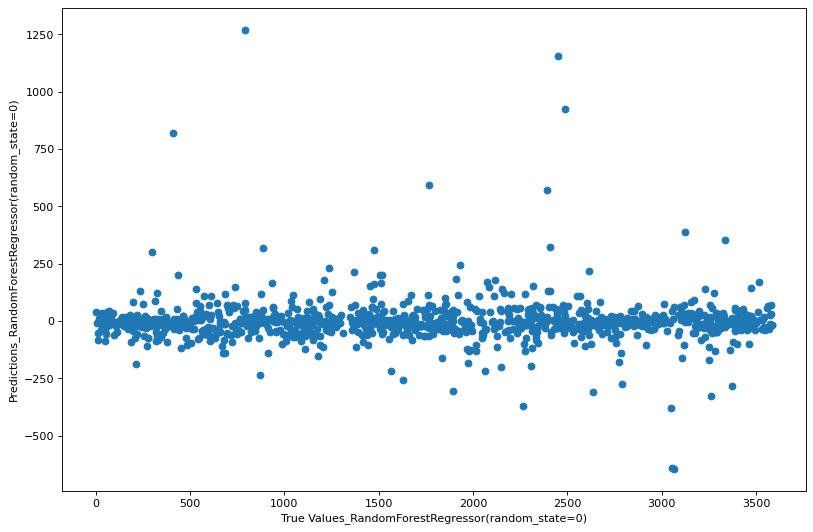

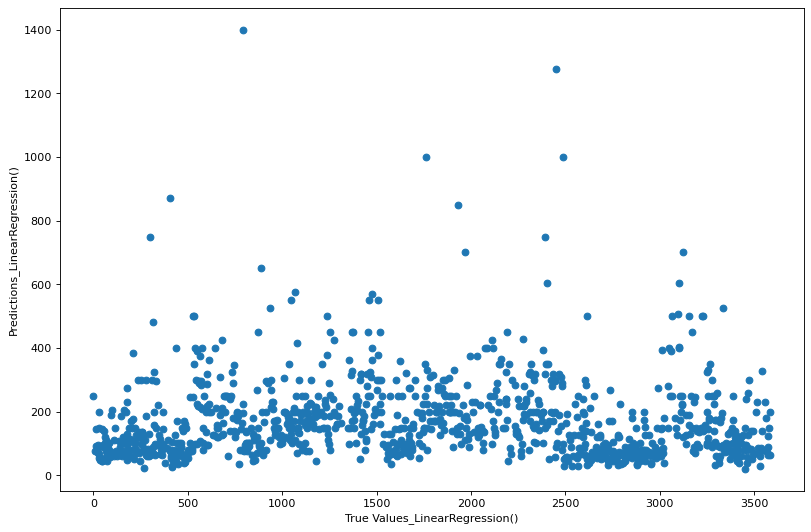

In [15]:
#Assign target y variable and features X variable
y = df_int_dummies.price

X = df_int_dummies.drop(labels = ["price"], axis = 1)

#split test and train dataset from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


#We will create a function to fit the model and evaluate
def model_evaluate(model, x_train, y_train, x_test, y_test):
    '''Input:
    model : define prediction algorithm that we want to apply
    x_train : training dataset with input features
    y_test: training data series for target variable
    x_test: validation dataset with input features
    y_test: validation data series for target variable
    
    1.) fit the model to training data set
    2.) predict the target variable for the validation data set
    3.) compare and evaluate the predicted target variable and actual target variable for the validation data set
    
    Output:
    1.) Mean absolute error for each model applied
    2.) scatter plot for the difference between actual and predicted target variable of the validation data set
    '''
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, pred)
    print("MAE from {0}:{1}".format(model, mae))
    fig = plt.figure(figsize=(12, 8), dpi=80)
    ax1 = fig.add_subplot(111)
    lines = plt.plot(y_test - pred,marker='o',linestyle='')
    ax1.set_xlabel('True Values_{}'.format(model))
    ax1.set_ylabel('Predictions_{}'.format(model))

#Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)    
model_evaluate(model_rf, X_train, y_train, X_test, y_test)

#Linear Regression
model_lr = LinearRegression()
model_evaluate(model_lr, X_train, y_train, X_test, y_test)

Random forest Regressor has a MAE of 46.944 comparing to Linear Regression MAE value 171.42, which helps us to understand that Random forest model is performing better than Linear Regression.

# Data analysis and Visualization to answer the business questions:

In the below analysis we will be looking into the mentioned business questions:

1.) What are the features that influence the property pricing?

2.) What time of year has the highest rental prices?

3.) Do Superhosts perform better than other hosts?

4.) How are the listings distributed on Boston city?

In [16]:
#Analyse the listing dataset
#Count the number of total number of entries for each type in room_type feature
df_int.groupby(['room_type']).count()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,superhost,neighbourhood_cleansed,cancellation_policy,property_type,host_response_time
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,...,2113,2113,2113,2113,2113,2113,2113,2113,2111,2113
Private room,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,...,1365,1365,1365,1365,1365,1365,1365,1365,1364,1365
Shared room,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79


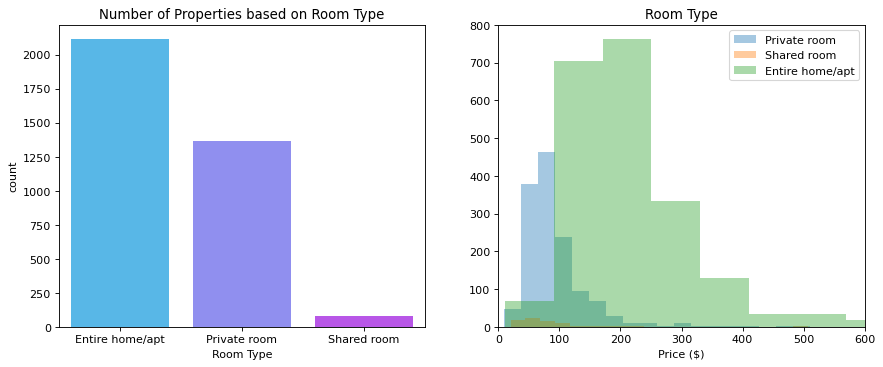

In [17]:
#Visualize the data to interpret the room_type and their mean price for each type
fig, axs = plt.subplots(1, 2, figsize=(13, 5), dpi=80)
sns.countplot(x = 'room_type', data = df_int, 
              palette = 'cool', ax=axs[0]).set_title("Number of Properties based on Room Type")
axs[0].set_xlabel('Room Type')


#Visualize and understand the distriution of pricing among the each room type.
sns.distplot(df_int[df_int.room_type == 'Private room']['price'],
             kde=False, ax=axs[1], label='Private room')
sns.distplot(df_int[df_int.room_type == 'Shared room']['price'],
             kde=False, ax=axs[1], label='Shared room')
sns.distplot(df_int[df_int.room_type == 'Entire home/apt']['price'],
             kde=False, ax=axs[1], label='Entire home/apt')

axs[1].set_xlim(0, 600)
axs[1].set_title('Room Type')
axs[1].set_xlabel('Price ($)')
axs[1].legend()

1. The Entire home/apt is the maximum number of entries in the boston listing.
2. Checking at the price distribution of Entire home/apt, the maximum number of listings are between 200-300 dollars.
3. The private rooms are maximum distributed between 50-150 dollars.

1.) How are the listings distributed on Boston city?

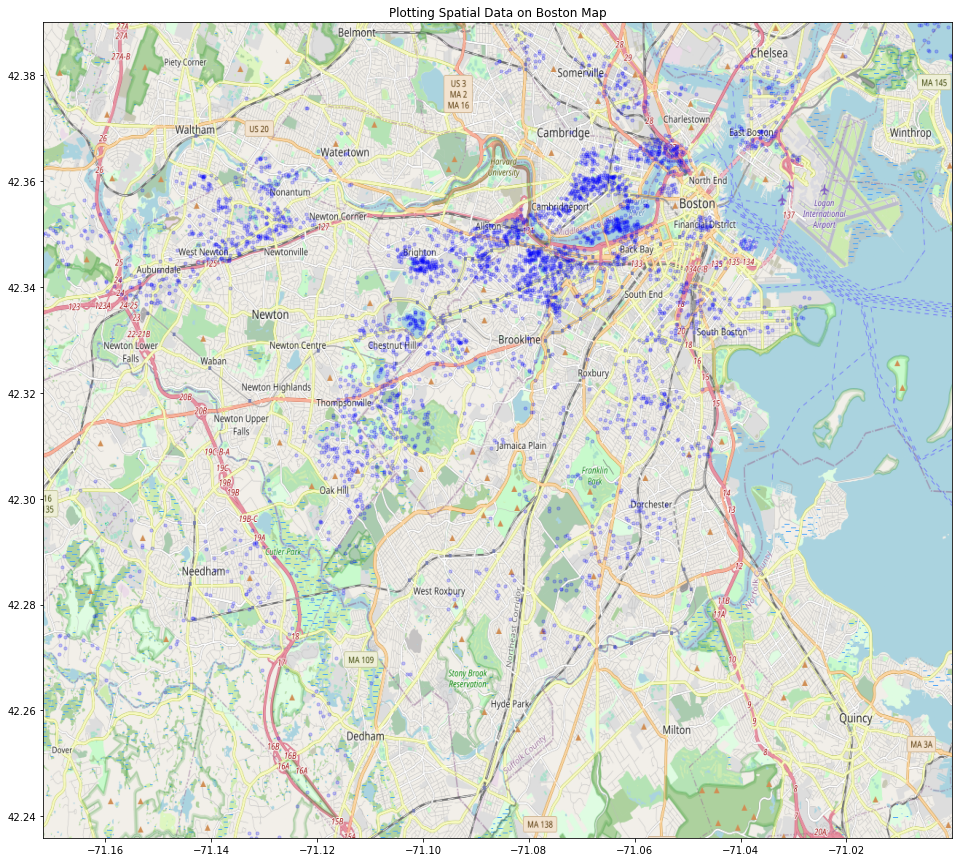

In [18]:
#Visualize the spatial data on Boston Map
BBox = (df_int.longitude.min(), df_int.longitude.max(), df_int.latitude.min(), df_int.latitude.max())
BBox

ruh_m = plt.imread('/kaggle/input/boston-map-hd/map.png')

fig, ax = plt.subplots(figsize = (18,15))
ax.scatter(df_int.longitude, df_int.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Boston Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

The distribution of listing on the Boston city map shows a dense number of listings are distributed along the motorway and railway. Also, the listings are highly populated along Boston north station, Cambridge port, Brighton, and East Boston.

2.) What are the features that influence the property pricing?

3.) What time of year has the highest rental prices?

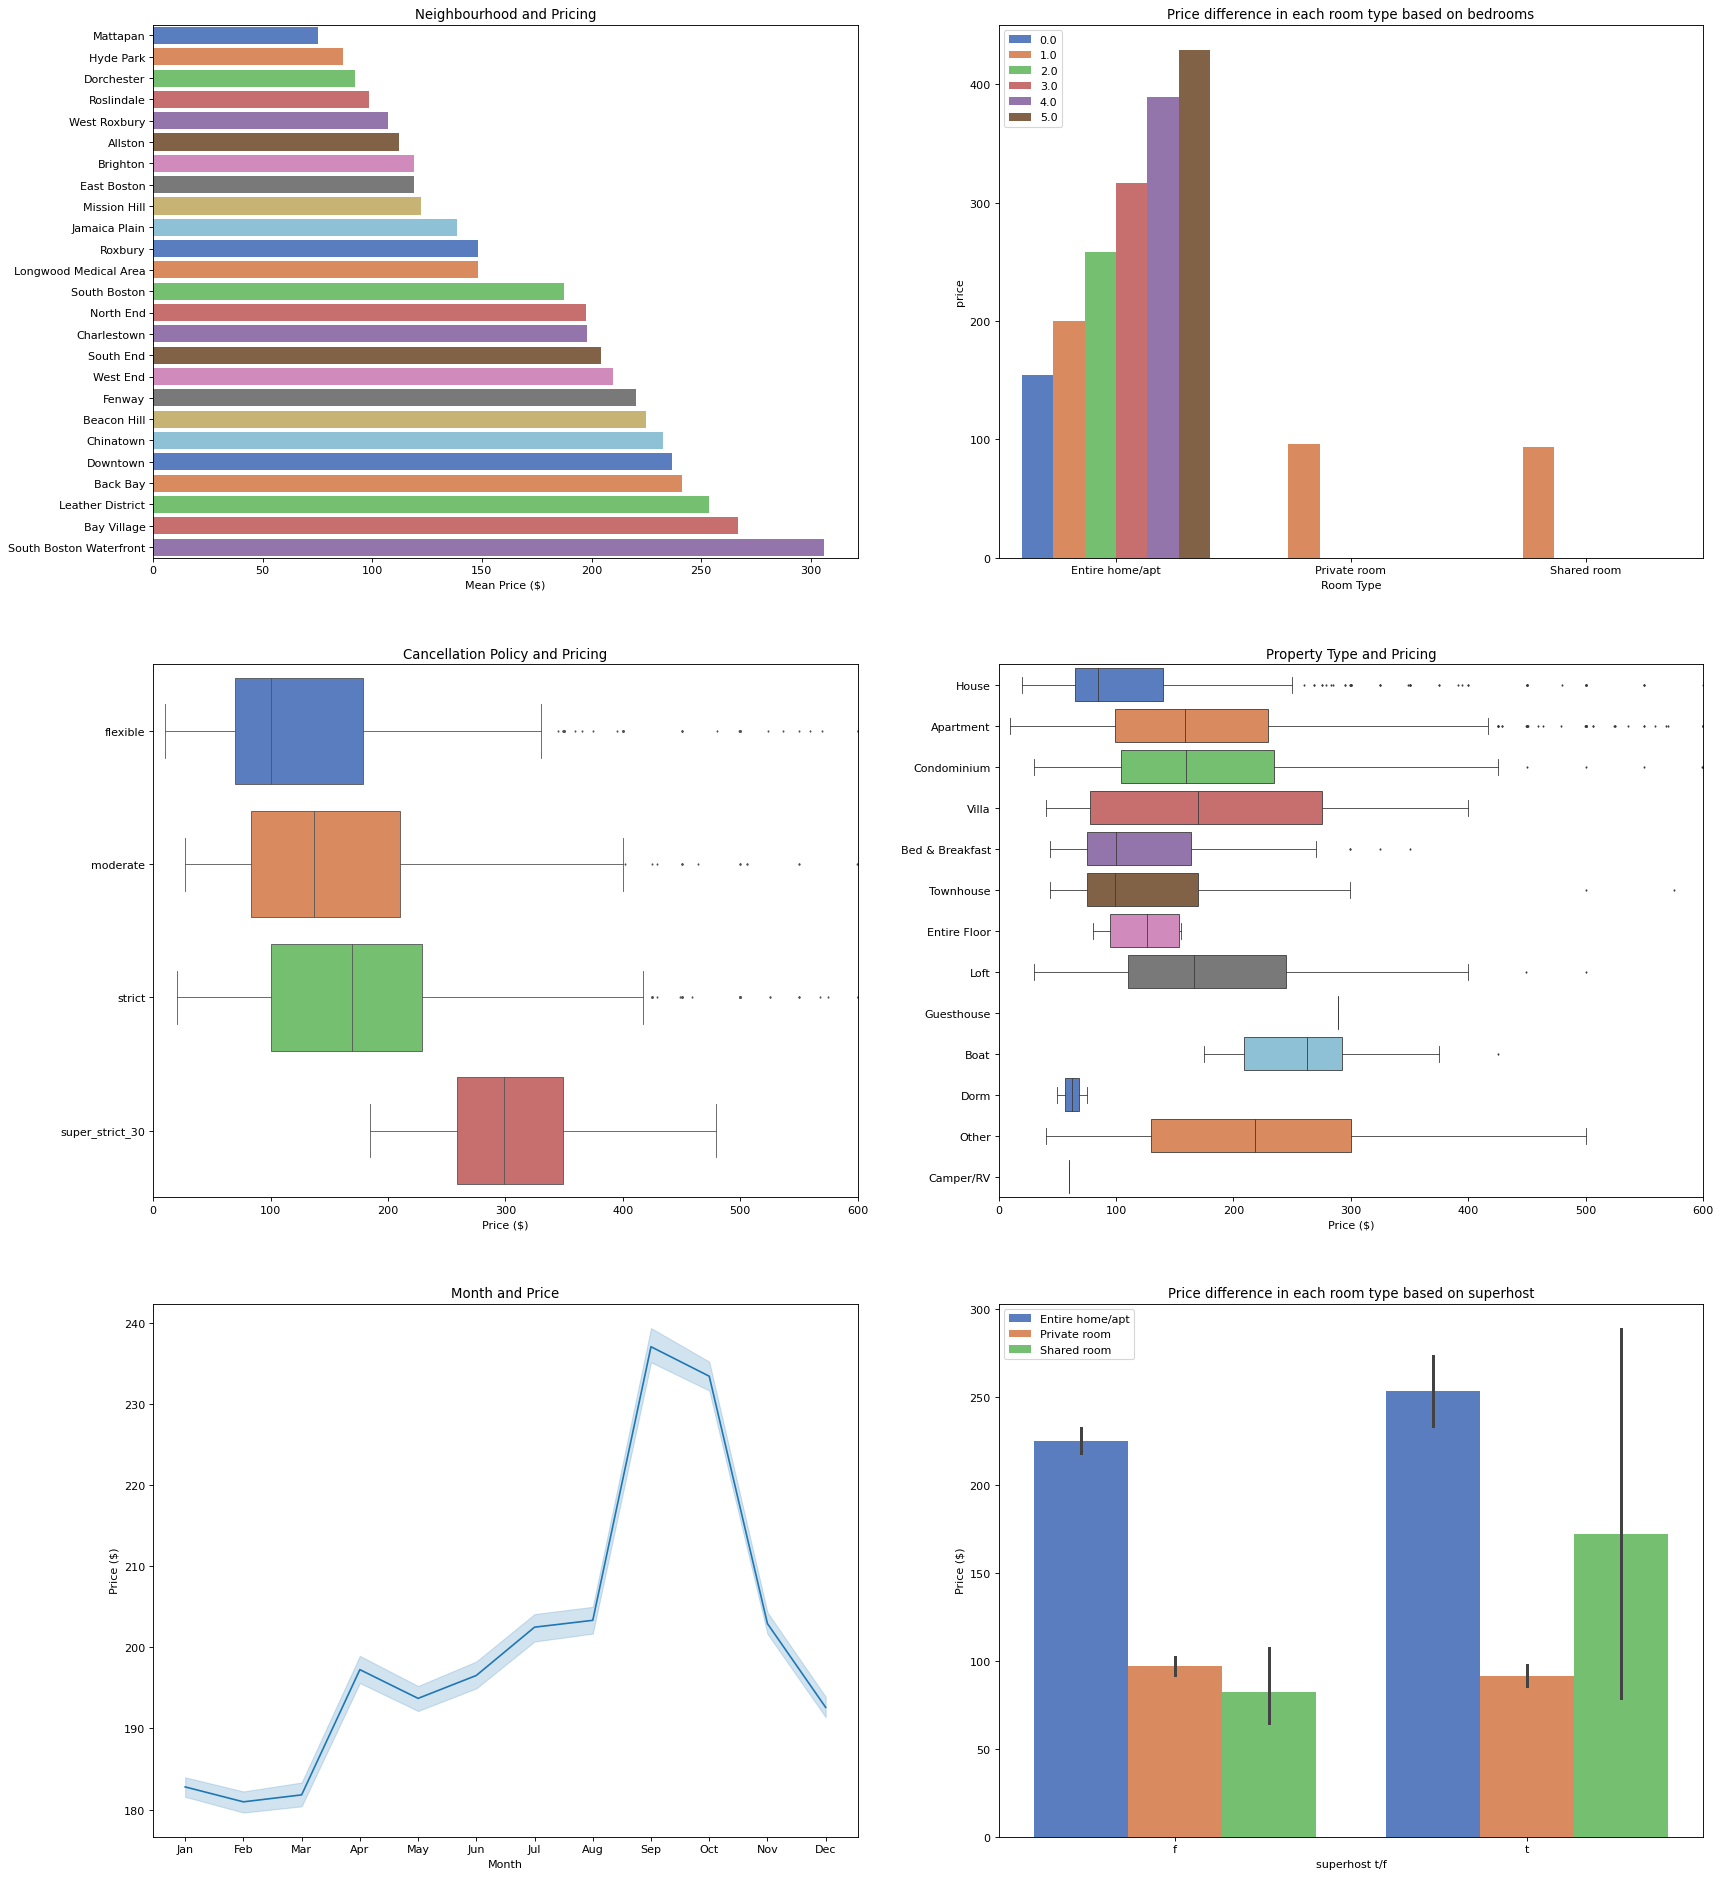

<Figure size 720x360 with 0 Axes>

In [19]:
#Visualize the data between the selected features against price column

fig, axs = plt.subplots(3, 2, figsize=(25, 30), dpi=80)

df_roomtype = df_int.groupby(['room_type', 'bedrooms'], as_index = False).mean()

# Neighbourhoods
neighbourhoods = df_int.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean
    }
).reset_index()
sns.barplot(
    x='price', y='neighbourhood_cleansed',
    data=neighbourhoods.sort_values('price'),
    orient='h',
    palette='muted',
    ax=axs[0, 0]
)
axs[0, 0].set_title('Neighbourhood and Pricing')
axs[0, 0].set_xlabel('Mean Price ($)')
axs[0, 0].set_ylabel('')

sns.barplot(x="room_type", y="price", hue= 'bedrooms', data= df_roomtype, 
            palette= 'muted', ax=axs[0, 1])

axs[0, 1].set_title('Price difference in each room type based on bedrooms')
axs[0, 1].set_xlabel('Room Type')
axs[0, 1].legend()

# Cancellation Policy
sns.boxplot(x='price', y='cancellation_policy', fliersize=1, linewidth=0.75,
            data=df_int, palette='muted', ax=axs[1, 0],
            order=['flexible', 'moderate', 'strict', 'super_strict_30'])
axs[1, 0].set_xlim(0, 600)
axs[1, 0].set_title('Cancellation Policy and Pricing')
axs[1, 0].set_xlabel('Price ($)')
axs[1, 0].set_ylabel('')

# Property type
sns.boxplot(x='price', y='property_type', fliersize=1, linewidth=0.75,
            data=df_int, palette='muted', ax=axs[1, 1])
axs[1, 1].set_xlim(0, 600)
axs[1, 1].set_title('Property Type and Pricing')
axs[1, 1].set_xlabel('Price ($)')
axs[1, 1].set_ylabel('')


#calendar
cats = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_cal['month'] = pd.Categorical(df_cal['month'], ordered=True, categories=cats)

plt.figure(figsize=(10,5))

sns.lineplot(data = df_cal, x = "month", y = "price", sort=True, ax = axs[2,0])

axs[2, 0].set_title("Month and Price")
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Price ($)')


#Superhost
sns.barplot(x="superhost", y="price", hue= 'room_type', data= df_int, 
            palette= 'muted', ax=axs[2, 1])

axs[2, 1].set_title('Price difference in each room type based on superhost')
axs[2, 1].set_xlabel('superhost t/f')
axs[2, 1].set_ylabel('Price ($)')
axs[2, 1].legend()


plt.tight_layout()
plt.show();



* The bar chart between neighborhood vs price, depicts how the change in price based on the neighborhood. Based on the visualization, South Boston Waterfront in the neighborhood is the most expensive listing next to Bay Village and Leather District.

* The difference in listing prices is co-related to the room types and the number of bedrooms. Based on the chart "Price difference in each room type based on bedrooms" the Entire home/apt is an expensive stay in the Boston data set, also, the price increases relatively with an increase in the number of bedrooms. The chart "Price difference in each room type based on superhost" again depicts a similarity in high pricing for the Entire home/apt, whereas the another insight we could draw is the properties with Superhost are higher than the properties with normal host.

* Based on the box plot "Property type and pricing" the other property type is in large numbers with high variance in price, apart from that, the insights are also says that large number of Villa type property available in the median price range. Further the analyses depict that the Condominium type properties are expensive than the Apartments and Villas.

* As per the cancellation policy data the super strict policy median value represents the high price(300). However, the outliers in other three policies distributed till the maximum price range. Most of the listing based on policies, considering 75th percentile in the box plot for Flexible is less than 200, for Moderate and strict policy is between 200 to 300.

* The line chart of Price vs Months depicts a seasonal trend in the change in monthly pricing. The pricing trend looks increasing throughout the months, starting from January, where the largest leap in pricing is identified in August and September months and drops between October and December. Also, the pricing during January to March is slightly flat and takes a small leap at March and April.

3.) Does Superhosts are performing well?


What is a Superhost?

Superhosts are experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests.

Once a host reaches Superhost status, a badge superhost badge will automatically appear on their listing and profile to help you identify them.

We check Superhosts’ activity four times a year to ensure that the programme highlights the people who are most dedicated to providing outstanding hospitality.

* Superhost column values

t = True

f = False

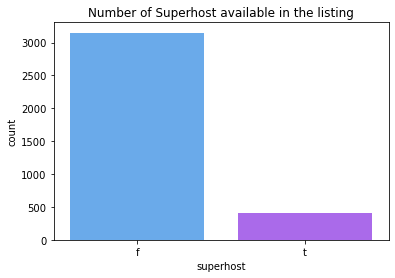

In [20]:
#Count the number of superhot in the listings
ax1 = sns.countplot(x="superhost", data=df_int, palette = 'cool').set_title("Number of Superhost available in the listing")

#Number of superhost in the Boston listing is lesser than the other host

In [21]:
#Analyse the reposne time between superhost and other host
#Group the dataframe with respect to superhost and mean of the each response time
grp_res = df_int.groupby(['superhost', 'host_response_time']).size()
grp_host = df_int.groupby(['superhost']).size()
grp_res_mean = grp_res/grp_host
#Reset index
grp_res_mean = grp_res_mean.reset_index(name='counts')
grp_res_mean

,superhost,host_response_time,counts
0,f,a few days or more,0.015556
1,f,within a day,0.153333
2,f,within a few hours,0.394603
3,f,within an hour,0.436508
4,t,within a day,0.090909
5,t,within a few hours,0.351351
6,t,within an hour,0.557740


In [22]:
#Visualize and compare the host response time between superhost and host
px.bar(grp_res_mean, x="superhost", y="counts", color="host_response_time",
            hover_data=['host_response_time'], barmode = 'stack', width=650, height=450,
      title="Aerage response time per host type")

Comparing the host and superhost response time, superhost has more than 50% of the response time as "within an hour". Also, the superhost doesn’t seem to delay a response time more than a day, whereas the host 1.5% of response time as "few days or more". In this comparison, we can find that superhost has performed better than the other hosts.

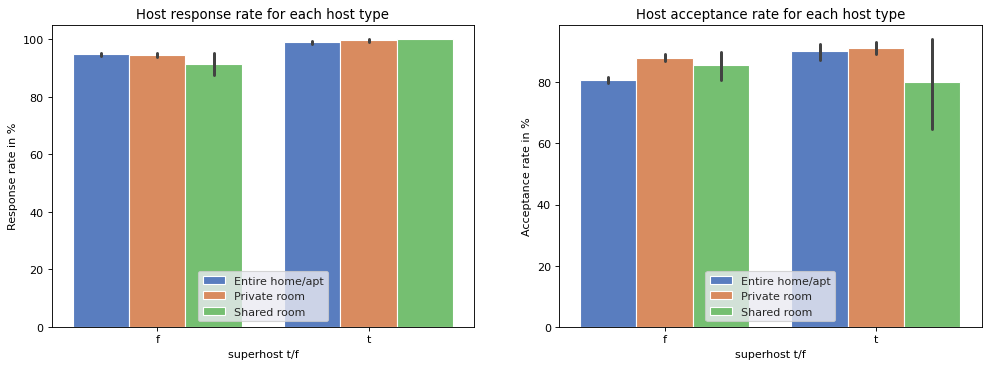

In [23]:
#Visualize
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=80)
sns.set_style(style="darkgrid")

sns.barplot(x="superhost", y="host_response_rate", hue= 'room_type', data= df_int, 
            palette= 'muted', ax=axs[0])

axs[0].set_title('Host response rate for each host type')
axs[0].set_xlabel('superhost t/f')
axs[0].set_ylabel('Response rate in %')
axs[0].legend()

sns.barplot(x="superhost", y="host_acceptance_rate", hue= 'room_type', data= df_int, 
            palette= 'muted', ax=axs[1])

axs[1].set_title('Host acceptance rate for each host type')
axs[1].set_xlabel('superhost t/f')
axs[1].set_ylabel('Acceptance rate in %')
axs[1].legend()

The response rate of the superhost is above 90% for all the room types,where the other host response rate are slightly below to the superhost, but doesn’t reflect a large difference. 

The acceptance rate has a difference in Entire home/apt and shared room features. The superhost have performed better in the Entire home/apt and fell below in share rooms than other hosts. From this visualization, we can infer that superhost has a better response rate, and fairly equal acceptance rate with the other host in the listings.

In [24]:
#Average Review values for superhost listings
df_host_review = df_int.groupby(['superhost']).mean()

df_host_review[["number_of_reviews", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
               "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value",
               "reviews_per_month"]]

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
superhost,,,,,,,,,
f,15.564444,91.313958,9.377025,9.189746,9.610224,9.613341,9.391923,9.106792,1.861762
t,44.941032,96.912554,9.887213,9.814240,9.942080,9.952033,9.607902,9.703380,2.855852


The average Reviews for cleanliness to the superhost score is 9.8. The other hosts have received the average review score is 9.3.

Text(0.5, 1.0, 'Average Review Score for Rooms with and without a Superhost')

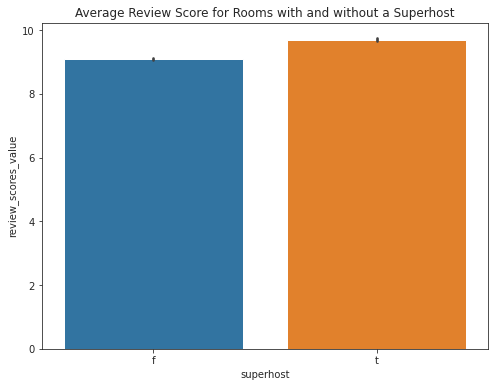

In [25]:
#Average Reveiw score value for a superhost
sns.set_style("ticks")
plt.figure(figsize=(8, 6))
sns.barplot(x = 'superhost', y = 'review_scores_value', data = df_int).set_title("Average Review Score for Rooms with and without a Superhost")

The bar plot shows that superhost has higher score than other host in the received average review score value.

<Figure size 864x432 with 0 Axes>

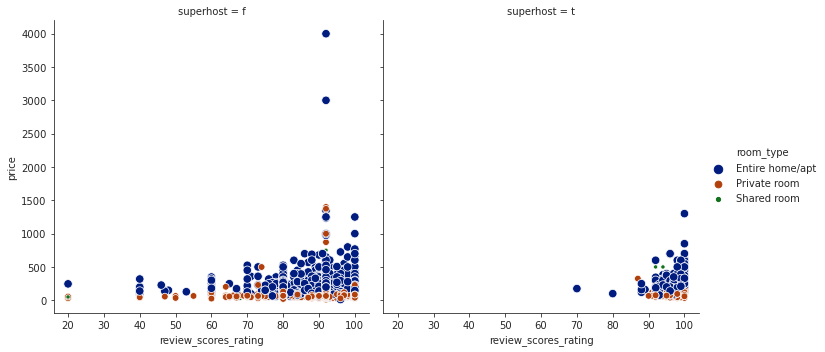

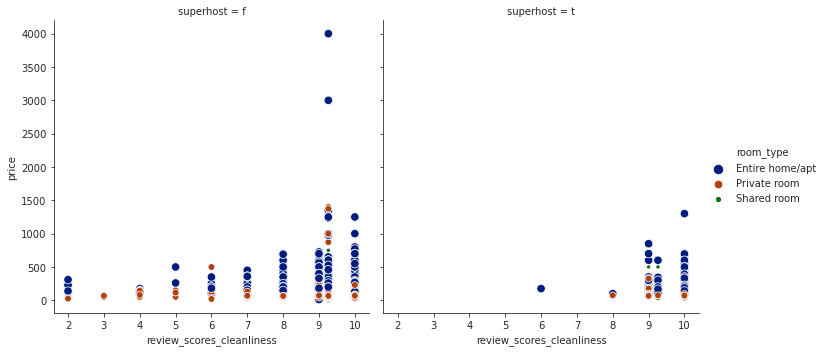

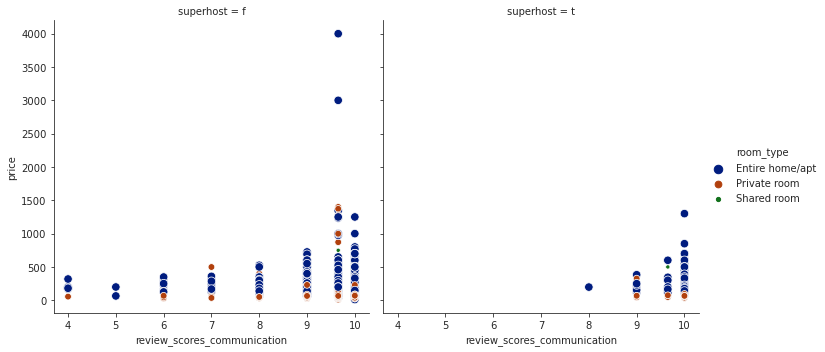

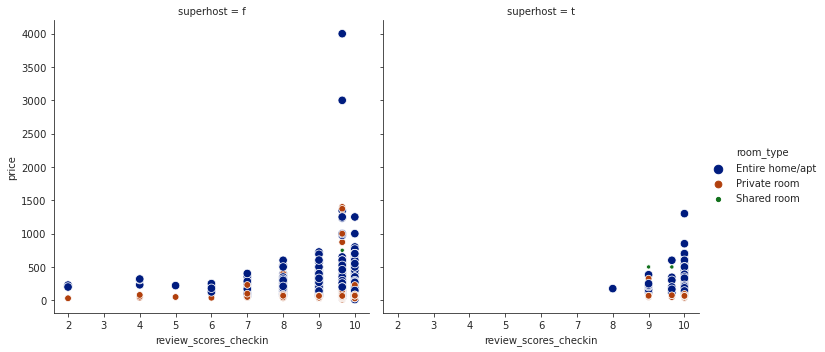

In [26]:
#Visulize the review scores for superhost based on ratings, cleanliness, communication, check-in
sns.set_style("ticks")
plt.figure(figsize=(12, 6))

sns.relplot(x = 'review_scores_rating', y = 'price', data = df_int, kind = "scatter", 
            col = "superhost", hue = "room_type", size = "room_type", palette = 'dark')

sns.relplot(x = 'review_scores_cleanliness', y = 'price', data = df_int, kind = "scatter", 
            col = "superhost", hue = "room_type", size = "room_type", palette = 'dark')

sns.relplot(data=df_int, x= 'review_scores_communication', y="price", kind = "scatter", 
            col = "superhost", hue = "room_type", size = "room_type", palette = "dark")

sns.relplot(data=df_int, x= 'review_scores_checkin', y="price", kind = "scatter", 
            col = "superhost", hue = "room_type", size = "room_type", palette = "dark")

The Reviews for cleanliness to the superhost as per the scatter plot are between 6–10, whose average review score is 9.8. The other hosts have received reviews between 2–10 and the average review score as 9.3.

Similar to the Cleanliness chart, superhosts have received highest review scores for communication between 8–10, and more number of reviews scores were 10. The superhost’s average review score for communication is 9.96, and other host have received 9.70. As per the insights generated, the superhosts have performed better than other hosts in terms of cleanliness and communication.